In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Crear lista de todos los periodos esperados
todos_periodos = pd.date_range(start='2017-01-01', end='2019-12-31', freq='MS').strftime('%Y%m').astype(int).tolist()

In [4]:
# Cargar el DataFrame de stocks
stocks = pd.read_csv('data/tb_stocks.csv', delimiter='\t')
stocks = stocks.copy()

In [5]:
# Función para verificar si un product_id tiene todos los periodos
def tiene_todos_periodos(group):
    return set(todos_periodos).issubset(set(group['periodo']))

# Aplicar la función a cada grupo de product_id
completitud = stocks.groupby('product_id').apply(tiene_todos_periodos)

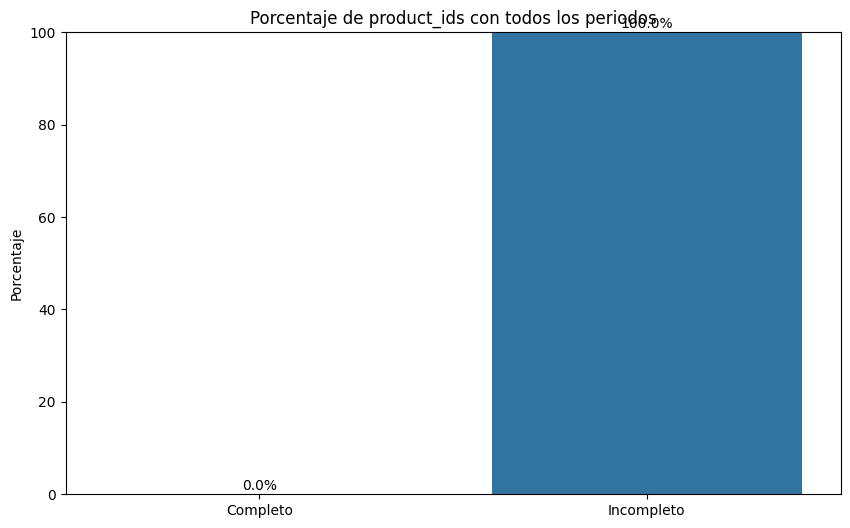

In [6]:
# Calcular el porcentaje de product_ids completos
porcentaje_completo = (completitud.sum() / len(completitud)) * 100

# Crear el gráfico
plt.figure(figsize=(10, 6))
sns.barplot(x=['Completo', 'Incompleto'], y=[porcentaje_completo, 100 - porcentaje_completo])
plt.title('Porcentaje de product_ids con todos los periodos')
plt.ylabel('Porcentaje')
plt.ylim(0, 100)

# Añadir etiquetas de porcentaje en las barras
for i, v in enumerate([porcentaje_completo, 100 - porcentaje_completo]):
    plt.text(i, v + 1, f'{v:.1f}%', ha='center')

plt.show()

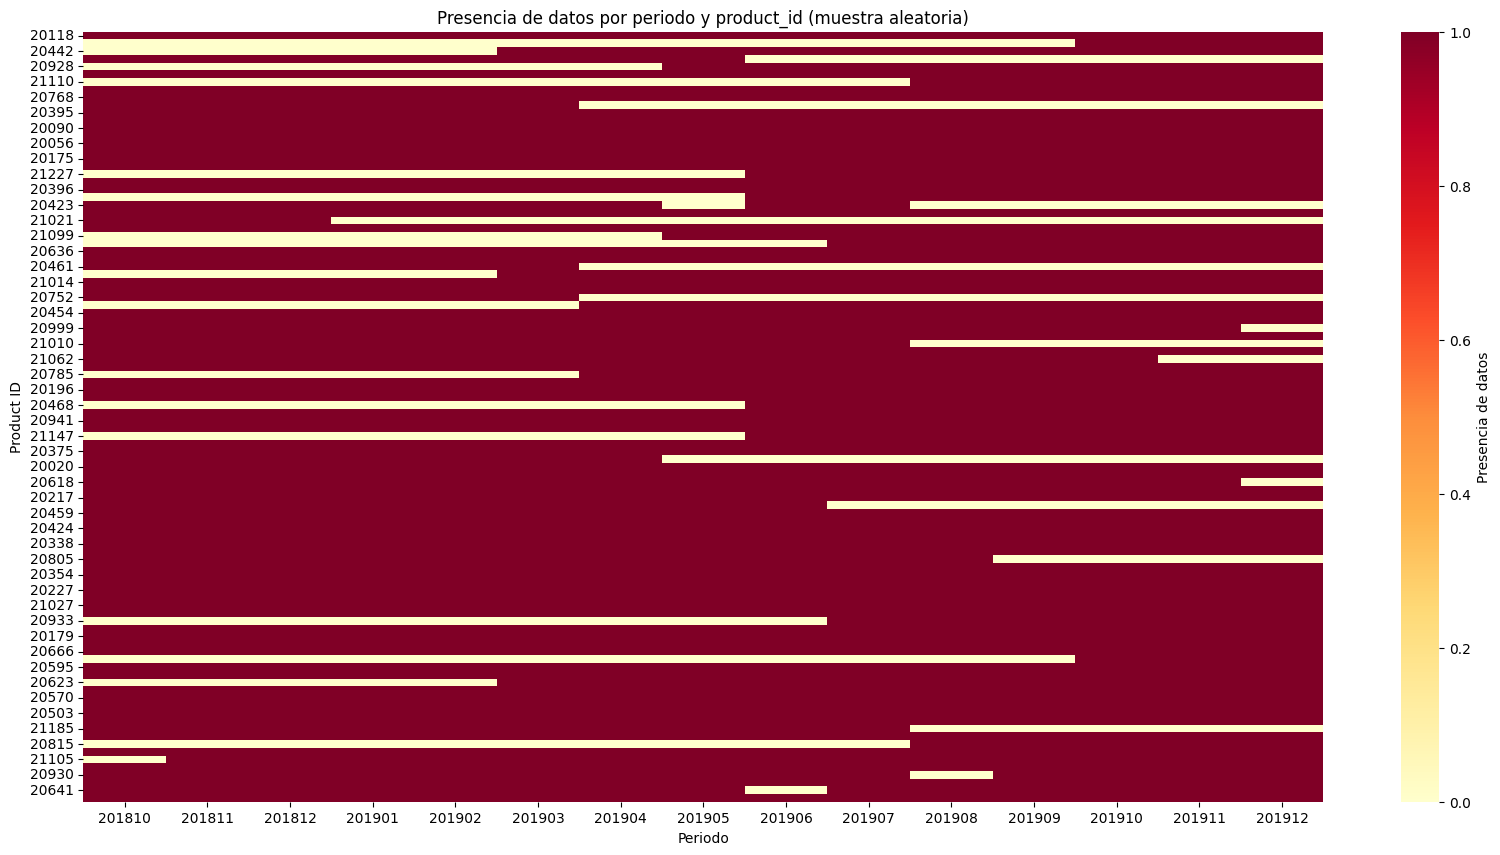

In [8]:
# Crear un DataFrame pivote
pivot = stocks.pivot(index='product_id', columns='periodo', values='stock_final')

# Reemplazar NaN con 0 y valores existentes con 1
pivot_binary = pivot.notnull().astype(int)

# Crear el heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(pivot_binary.sample(n=min(100, len(pivot_binary))), # Muestra solo 100 product_ids aleatorios
            cmap='YlOrRd', 
            cbar_kws={'label': 'Presencia de datos'})
plt.title('Presencia de datos por periodo y product_id (muestra aleatoria)')
plt.xlabel('Periodo')
plt.ylabel('Product ID')
plt.show()